In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('clean_train_data.csv')

## Clustering

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [4]:
def eval_nclusters(model,X_data, min_clusters=3,max_clusters=25):
    metric =[]
    for k in range(min_clusters, max_clusters + 1):
        model = model(k)
        labels = model.fit_predict(X_data)
        metric.append(silhouette_score(X_data, labels))
    sns.lineplot(x = range(min_clusters, max_clusters+1), y=metric, marker='x', linewidth=2, color='b')
    plt.axvline(x=10, color='red', linestyle='--', label='Best number of clusters')
    # Set labels and title
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette score Across Different Numbers of Clusters')
    plt.show()

## Kmeans

In [5]:
keep_cols = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE','CREDIT_LIMIT']
# Using the credit limit as feature for the Kmeans as it is important to take into account for segmentation.

In [6]:
scaler = StandardScaler()
X_data = scaler.fit_transform(df[keep_cols])

In [7]:
df[keep_cols]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_LIMIT
0,908.354652,1.000000,231.35,0.00,231.35,944.183414,1.000000,0.000000,0.857143,0.142857,3,7,161.975360,930.115009,0.0,7,1000.0
1,744.083484,1.000000,1096.98,589.48,507.50,174.714236,1.000000,0.500000,0.600000,0.200000,4,14,1873.388189,148.294074,0.1,10,5000.0
2,738.067431,1.000000,752.97,752.97,0.00,0.000000,0.666667,0.666667,0.000000,0.000000,0,11,1393.051729,282.663936,0.0,12,2500.0
3,333.085021,0.636364,980.00,980.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1485.205378,163.396716,0.0,12,1000.0
4,3559.634883,1.000000,7654.81,6984.29,670.52,0.000000,0.666667,0.666667,0.333333,0.000000,0,45,2785.055072,783.737906,0.0,12,7000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8794,970.120944,1.000000,120.00,120.00,0.00,394.626936,0.083333,0.083333,0.000000,0.250000,8,1,1646.068152,299.386794,0.0,12,1500.0
8795,2431.019916,0.818182,729.82,729.82,0.00,2555.909872,0.181818,0.181818,0.000000,0.181818,13,4,46.969049,18924.001990,0.0,11,3500.0
8796,2377.742667,1.000000,2527.04,796.66,1730.38,2056.332882,1.000000,0.333333,1.000000,0.333333,6,92,1461.368469,1105.554363,0.0,12,5000.0
8797,12.423324,0.545455,21.99,0.00,21.99,0.000000,0.090909,0.000000,0.090909,0.000000,0,1,0.000000,823.436502,0.0,11,4000.0


In [8]:
min_clusters = 3
max_clusters = 30
innertia_metric =[]
silohuette_metric =[]
for k in range(min_clusters, max_clusters + 1):
  model = KMeans(n_clusters =k, n_init = 'auto')
  labels = model.fit_predict(X_data)
  silohuette_metric.append(silhouette_score(X_data, labels))
  innertia_metric.append(model.inertia_)

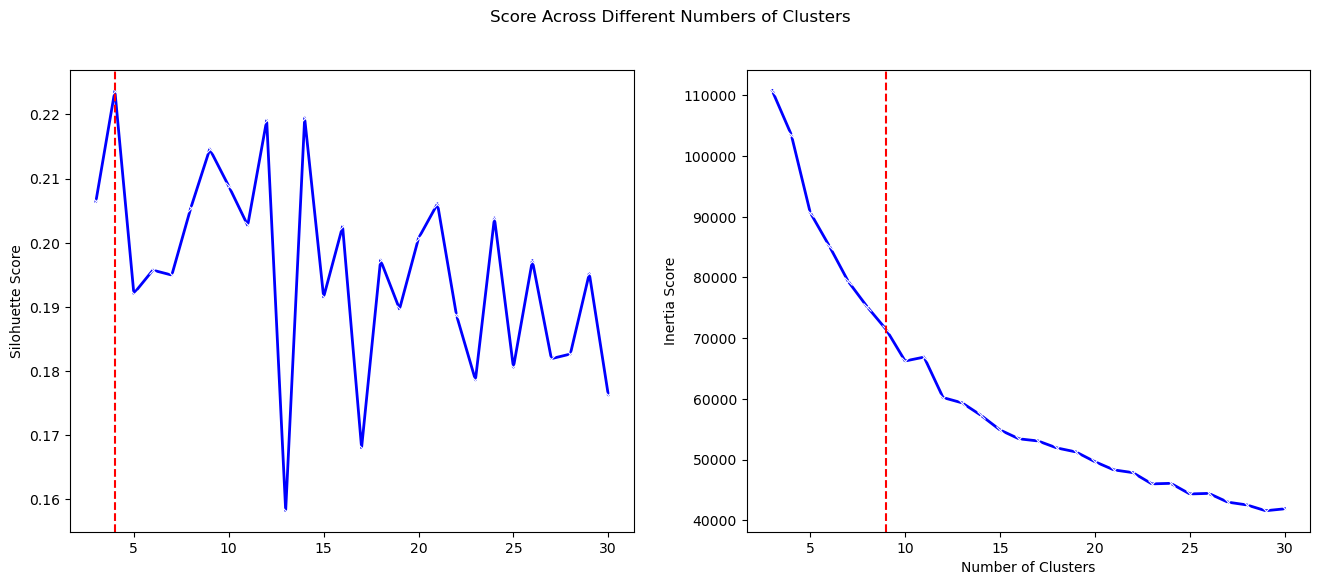

In [9]:

clusters = range(min_clusters, max_clusters+1)
fig, ax = plt.subplots(1,2, figsize=(16,6))
ax.flatten()
sns.lineplot(x = clusters, y=silohuette_metric, marker='x', linewidth=2, color='b', ax=ax[0])
sns.lineplot(x = clusters, y=innertia_metric, marker='x', linewidth=2, color='b', ax=ax[1])
ax[0].axvline(x=clusters[np.argmax(silohuette_metric)], color='red', linestyle='--', label='Best number of clusters')
ax[1].axvline(x=9, color='red', linestyle='--', label='Best number of clusters',)
# Set labels and title
plt.xlabel('Number of Clusters')
ax[0].set(ylabel='Silohuette Score')
ax[1].set(ylabel='Inertia Score')
plt.suptitle('Score Across Different Numbers of Clusters')
plt.show()

Setting best n clusters to 9 as according to both criteria is the best.

In [10]:
best_n = 9
df['kmeans_9'] = KMeans(n_clusters =9, n_init = 'auto').fit_predict(X_data)


In [11]:
X_data

array([[-0.31429158,  0.51746368, -0.36025355, ..., -0.52660373,
        -3.38468203, -0.96041717],
       [-0.39336682,  0.51746368,  0.04491386, ..., -0.18564559,
        -1.13728041,  0.13899534],
       [-0.39626277,  0.51746368, -0.11610371, ..., -0.52660373,
         0.36098734, -0.54813748],
       ...,
       [ 0.39302801,  0.51746368,  0.7142688 , ..., -0.52660373,
         0.36098734,  0.13899534],
       [-0.74556621, -1.40483156, -0.45824675, ..., -0.52660373,
        -0.38814653, -0.13585779],
       [-0.74135007, -2.17375389, -0.26647758, ...,  2.88297766,
         0.36098734, -0.41071092]])

In [12]:
df['kmeans_9']

0       1
1       1
2       0
3       5
4       3
       ..
8794    0
8795    4
8796    3
8797    5
8798    5
Name: kmeans_9, Length: 8799, dtype: int32

Text(0, 0.5, 'Count')

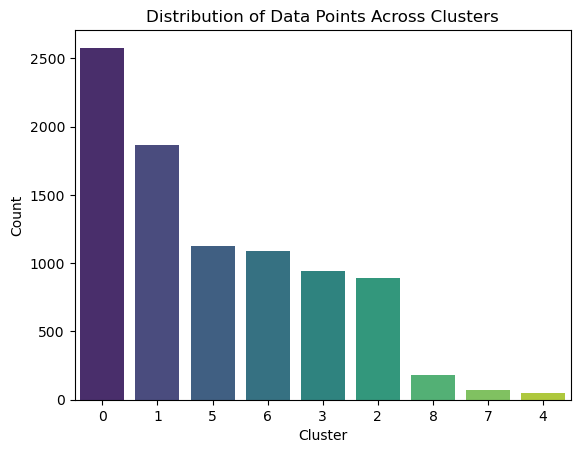

In [13]:
sns.countplot(x='kmeans_9', data=df, order=df['kmeans_9'].value_counts().index, palette='viridis')
plt.title('Distribution of Data Points Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')

In [14]:
df

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,kmeans_9
0,693,908.354652,1.000000,231.35,0.00,231.35,944.183414,1.000000,0.000000,0.857143,0.142857,3,7,1000.0,161.975360,930.115009,0.0,7,1
1,6277,744.083484,1.000000,1096.98,589.48,507.50,174.714236,1.000000,0.500000,0.600000,0.200000,4,14,5000.0,1873.388189,148.294074,0.1,10,1
2,7577,738.067431,1.000000,752.97,752.97,0.00,0.000000,0.666667,0.666667,0.000000,0.000000,0,11,2500.0,1393.051729,282.663936,0.0,12,0
3,5981,333.085021,0.636364,980.00,980.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1000.0,1485.205378,163.396716,0.0,12,5
4,6748,3559.634883,1.000000,7654.81,6984.29,670.52,0.000000,0.666667,0.666667,0.333333,0.000000,0,45,7000.0,2785.055072,783.737906,0.0,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8794,3049,970.120944,1.000000,120.00,120.00,0.00,394.626936,0.083333,0.083333,0.000000,0.250000,8,1,1500.0,1646.068152,299.386794,0.0,12,0
8795,5666,2431.019916,0.818182,729.82,729.82,0.00,2555.909872,0.181818,0.181818,0.000000,0.181818,13,4,3500.0,46.969049,18924.001990,0.0,11,4
8796,2041,2377.742667,1.000000,2527.04,796.66,1730.38,2056.332882,1.000000,0.333333,1.000000,0.333333,6,92,5000.0,1461.368469,1105.554363,0.0,12,3
8797,6776,12.423324,0.545455,21.99,0.00,21.99,0.000000,0.090909,0.000000,0.090909,0.000000,0,1,4000.0,0.000000,823.436502,0.0,11,5


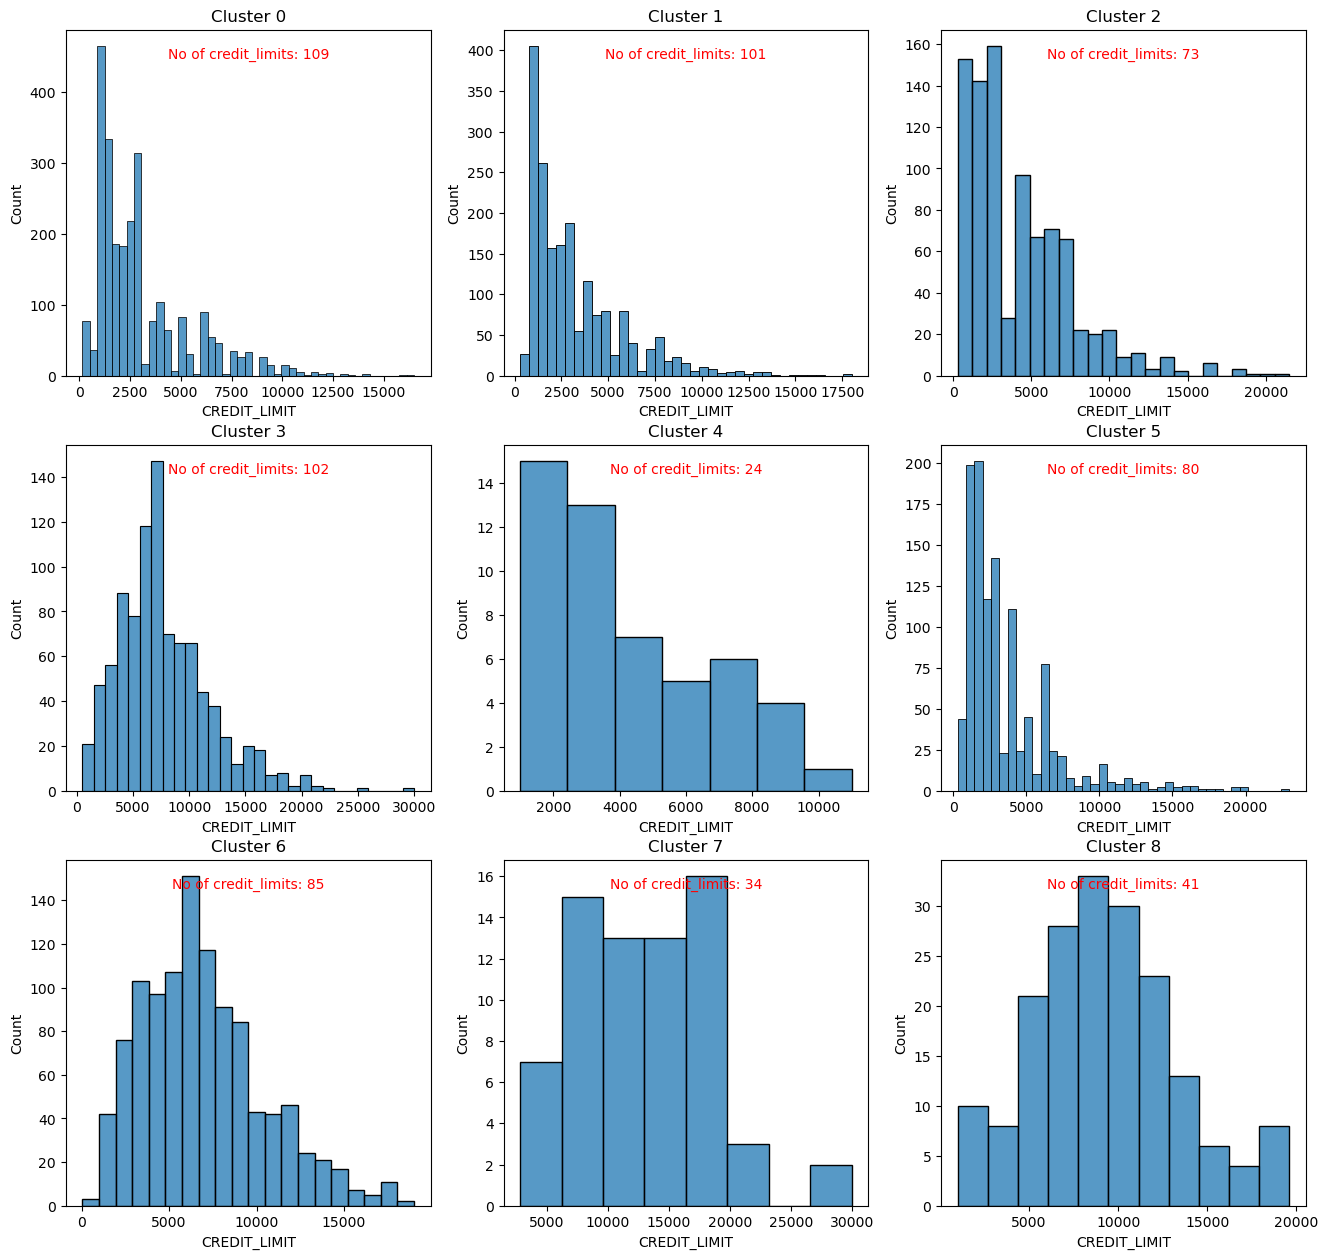

In [15]:
fig, ax = plt.subplots(3,3, figsize=(16,12))
ax = ax.flatten()
for i in range(best_n):
    credit_limit_counts = df[df['kmeans_9']==i]['CREDIT_LIMIT'].value_counts()
    # sns.barplot(x=credit_limit_counts.index, y=credit_limit_counts.values, palette='viridis', ax=ax[i])
    sns.histplot(df[df['kmeans_9']==i]['CREDIT_LIMIT'], ax=ax[i])
    ax[i].text(0.5, 0.95, f'No of credit_limits: {len(credit_limit_counts)}', transform=ax[i].transAxes,
               verticalalignment='top', horizontalalignment='center', color='red', fontsize=10)
    # print(len(credit_limit_counts))
    ax[i].set(title=f'Cluster {i}')
    # ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')
plt.subplots_adjust(bottom=-0.1)
plt.show()

In [16]:
df.groupby('kmeans_9').agg(['mean','std']).round(4).T

kmeans_9                                       0          1          2  \
Unnamed: 0                       mean  4495.6965  4761.7058  5035.5588   
                                 std   2490.6010  2640.7178  2608.7076   
BALANCE                          mean  1322.0253  1015.3210   104.8847   
                                 std   1036.7798  1099.4769   128.1453   
BALANCE_FREQUENCY                mean     0.9632     0.9608     0.8818   
                                 std      0.0836     0.1044     0.1633   
PURCHASES                        mean   272.1934   881.3110  1015.3651   
                                 std    491.9641   703.6039   847.6437   
ONEOFF_PURCHASES                 mean   235.7275   297.5052   351.6688   
                                 std    474.2533   470.0355   654.8145   
INSTALLMENTS_PURCHASES           mean    36.6579   584.3815   663.8295   
                                 std    126.1309   545.8287   664.4541   
CASH_ADVANCE                     mean   623.6085   281.9827    32.7017   
                                 std    839.6717   694.2936   331.3156   
PURCHASES_FREQUENCY              mean     0.1535     0.8620     0.8283   
                                 std      0.1870     0.1630     0.2017   
ONEOFF_PURCHASES_FREQUENCY       mean     0.1063     0.1745     0.1998   
                                 std      0.1642     0.2515     0.3150   
PURCHASES_INSTALLMENTS_FREQUENCY mean     0.0470     0.7506     0.6669   
                                 std      0.1051     0.2633     0.3270   
CASH_ADVANCE_FREQUENCY           mean     0.1344     0.0565     0.0058   
                                 std      0.1332     0.1109     0.0343   
CASH_ADVANCE_TRX                 mean     2.4183     1.0766     0.0963   
                                 std      2.8367     2.3172     0.6794   
PURCHASES_TRX                    mean     2.9061    18.4287    16.5521   
                                 std      4.7167    11.7428    12.1401   
CREDIT_LIMIT                     mean  3056.0600  3284.4817  4251.3993   
                                 std   2345.0664  2551.8168  3327.5845   
PAYMENTS                         mean   891.0619  1067.8636  1145.9479   
                                 std    969.6724  1039.5568  1126.2620   
MINIMUM_PAYMENTS                 mean   626.3807   710.7221   175.7394   
                                 std    984.2900  1170.7671   254.2121   
PRC_FULL_PAYMENT                 mean     0.0236     0.0579     0.7934   
                                 std      0.0644     0.1071     0.1966   
TENURE                           mean    11.5386    11.6243    11.3124   
                                 std      1.2857     1.1847     1.6148   

kmeans_9                                       3           4          5  \
Unnamed: 0                       mean  3333.2845   4046.6078  5116.5151   
                                 std   2228.3190   2779.9702  2679.3699   
BALANCE                          mean  2291.2312   3942.5068   111.9521   
                                 std   2467.1091   2299.1745   235.9813   
BALANCE_FREQUENCY                mean     0.9855      0.9875     0.3437   
                                 std      0.0637      0.0482     0.1839   
PURCHASES                        mean  3626.2153    903.0369   297.2408   
                                 std   2052.9595   1598.1587   454.4824   
ONEOFF_PURCHASES                 mean  2453.3100    103.1845   194.8624   
                                 std   1836.1900    374.8387   435.1229   
INSTALLMENTS_PURCHASES           mean  1173.5422    799.8524   102.6415   
                                 std   1220.2953   1582.6016   191.4490   
CASH_ADVANCE                     mean   458.8141    862.1375   344.6031   
                                 std   1071.2311   1820.2946   824.3164   
PURCHASES_FREQUENCY              mean     0.9483      0.4832     0.2392   
                                 std      0.1105      0.4372 

## Classification of data to Cluster

### Load libraries

In [17]:
from sklearn.linear_model import RidgeCV, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, precision_recall_curve, precision_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.model_selection import cross_val_score, KFold

### Useful functions

In [18]:
#transformers
numeric_transf = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='median')), ('scaler',StandardScaler())]
)
# Setup the preprocessing steps
preprocess = ColumnTransformer(
    transformers = [
        ('num', numeric_transf, selector(dtype_exclude='object'))
    ]
)

In [19]:
def create_features(df):
    df['purch_per_trx'] = np.where(df['PURCHASES_TRX']>0,df['PURCHASES']/df['PURCHASES_TRX'], 0)
    df['cash_adv_per_trx'] = np.where(df['CASH_ADVANCE_TRX']>0,df['CASH_ADVANCE']/df['CASH_ADVANCE_TRX'], 0)
    df['BALANCE_by_freq'] = df['BALANCE']*df['BALANCE_FREQUENCY']
    df['ONEOFF_PURCHASES_by_freq'] = df['ONEOFF_PURCHASES']*df['ONEOFF_PURCHASES_FREQUENCY']
    df['INSTALLMENTS_PURCHASES_by_freq'] = df['INSTALLMENTS_PURCHASES']*df['PURCHASES_INSTALLMENTS_FREQUENCY']
    df['CASH_ADVANCE_by_freq'] = df['CASH_ADVANCE']*df['CASH_ADVANCE_FREQUENCY']
    df['interest_p_year'] = np.where(df['TENURE']>0,(df['BALANCE'] - ((df['PURCHASES'] + df['CASH_ADVANCE']) - (df['PAYMENTS'] + df['MINIMUM_PAYMENTS']) )) /df['TENURE'],(df['BALANCE'] - (df['PURCHASES'] + df['CASH_ADVANCE']) - (df['PAYMENTS'] + df['MINIMUM_PAYMENTS']) ))
    return df

In [20]:
def plotImportances(m, keep_cols_engi2):
    # Create a DataFrame with feature names, class labels, and coefficient values
    data = {'Feature': np.tile(keep_cols_engi2, best_n),
            'Class': np.repeat(range(best_n), len(keep_cols_engi2)),
            'Coefficient': np.concatenate(m.named_steps['logit'].coef_)}

    df_plot = pd.DataFrame(data)

    bar_width = 0.8

    sns.catplot(data=df_plot, x='Feature', y='Coefficient', hue='Class', kind='bar', height=8, aspect=2, width=bar_width)

    plt.title('Feature Importance - Logistic Regression Classifier for Different Classes')
    plt.xlabel('Feature')
    plt.ylabel('Coefficient Value')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    # plt.legend(title='Class', loc='upper right', bbox_to_anchor=(1.1, 1))

    plt.show()

In [21]:
keep_cols_engi2 = ['PURCHASES', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'purch_per_trx',
       'cash_adv_per_trx', 'BALANCE_by_freq', 'ONEOFF_PURCHASES_by_freq',
       'INSTALLMENTS_PURCHASES_by_freq', 'CASH_ADVANCE_by_freq','interest_p_year']

In [22]:
# Create variables by feature engineering
df = create_features(df)

### Try with same features as in the clusetering

In [23]:
keep_cols1 = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

In [24]:
X = df[keep_cols1]
# The task will be to classify the point to a cluster
y = df['kmeans_9']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 123)

In [25]:
X_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
7019,2135.365916,1.000000,0.00,0.00,0.00,1884.671403,0.000000,0.000000,0.000000,0.166667,3,0,565.655851,659.678948,0.000000,12
8603,2000.797758,1.000000,1037.50,0.00,1037.50,0.000000,0.416667,0.000000,0.416667,0.000000,0,5,1864.665644,450.605909,0.272727,12
4886,345.754830,1.000000,3125.03,492.71,2632.32,0.000000,1.000000,0.166667,1.000000,0.000000,0,36,3016.560969,189.375956,1.000000,12
1984,401.822565,1.000000,518.23,116.23,402.00,0.000000,0.500000,0.166667,0.333333,0.000000,0,8,160.689352,190.313074,0.000000,12
963,7339.943073,0.875000,0.00,0.00,0.00,9123.485636,0.000000,0.000000,0.000000,0.375000,11,0,1314.192386,2062.636412,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7382,177.268927,0.636364,429.88,429.88,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,4,1590.946442,133.273654,0.250000,12
7763,3421.570645,1.000000,0.00,0.00,0.00,287.279970,0.000000,0.000000,0.000000,0.083333,1,0,1387.841466,801.652585,0.000000,12
5218,863.988978,0.555556,160.80,0.00,160.80,2259.940530,0.555556,0.000000,0.444444,0.333333,3,5,216.340896,461.990627,0.000000,9
1346,812.934042,1.000000,50.00,50.00,0.00,2185.500596,0.142857,0.142857,0.000000,1.000000,16,1,726.683966,127.843735,0.000000,7


In [26]:
steps = [('preprocess', preprocess),('logit', LogisticRegressionCV(cv=3, max_iter=10000))]
mk = Pipeline(steps)
mk.fit(X_train, y_train) #This m here predicts clusters
y_pred = mk.predict(X_test)

In [27]:
y_pred

array([5, 0, 0, ..., 0, 4, 0])

The result is acceptable for all the clusters, so we could classify correctly the new data to the right cluster, above 90% of preccision.

In [28]:
best_n = 9

C:\Users\52555\anaconda3-\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


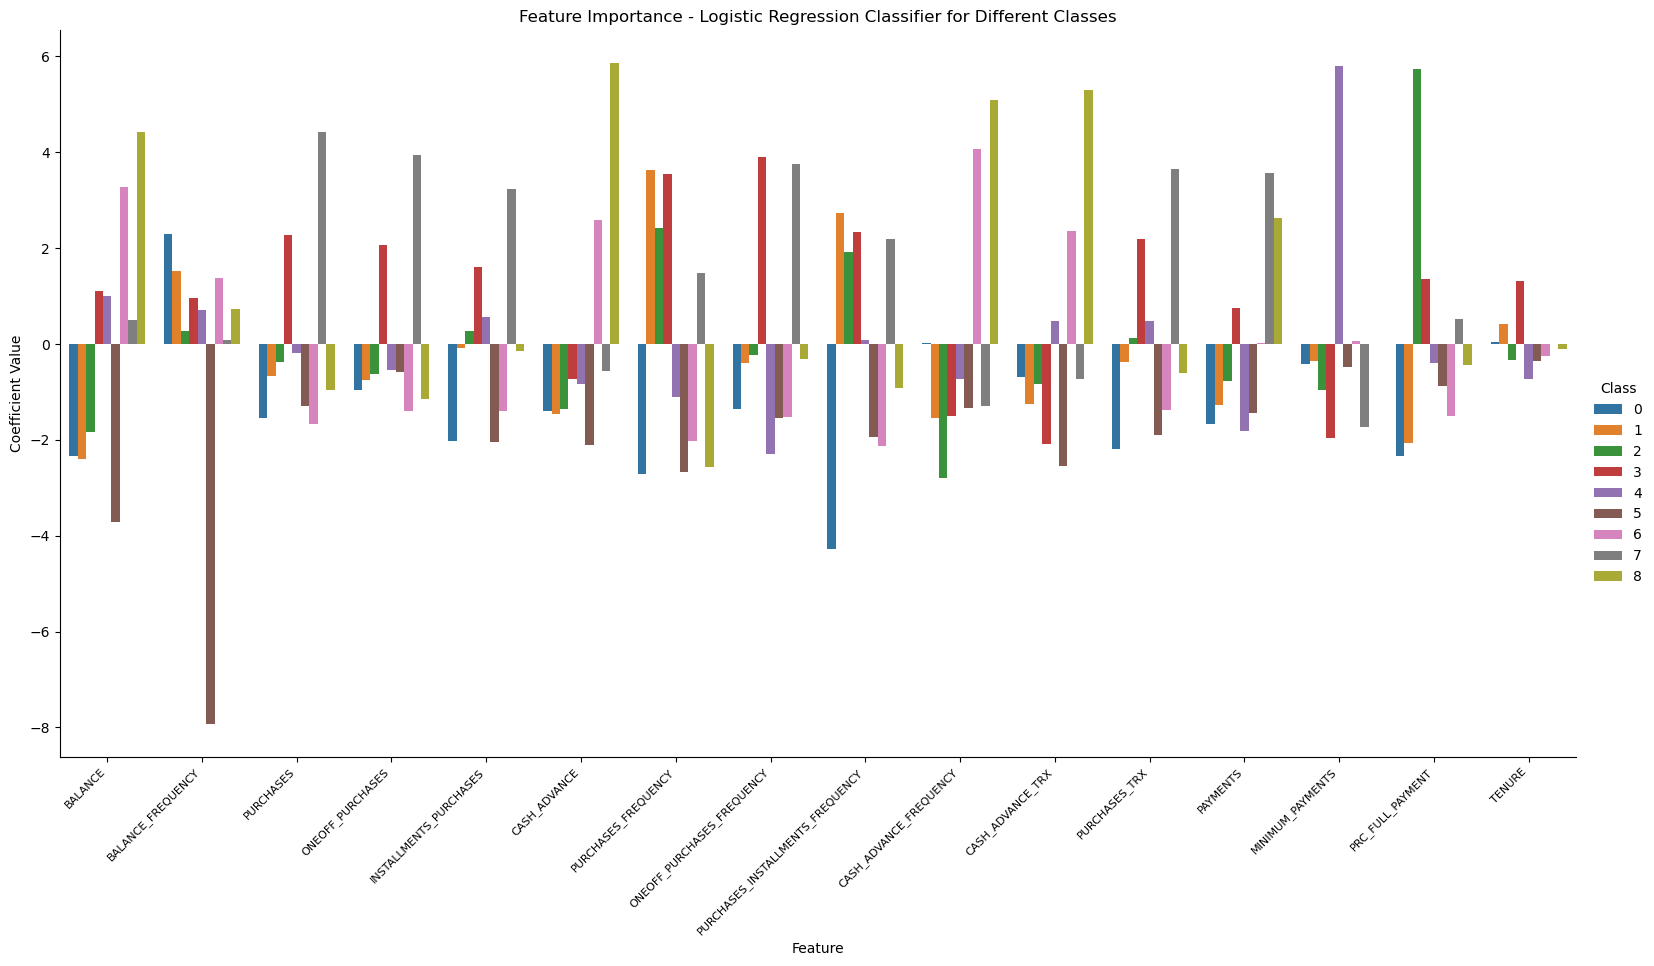

In [30]:
plotImportances(mk, keep_cols1)

From this feature importance we can describe the different clusters.

For example, the cluster 5 (brown) are customers with the lowest number of years Tenure, low payments, and low purchase frequency. However this customers do frequech cash advance of not too high amounts.

<Axes: xlabel='kmeans_9', ylabel='CREDIT_LIMIT'>

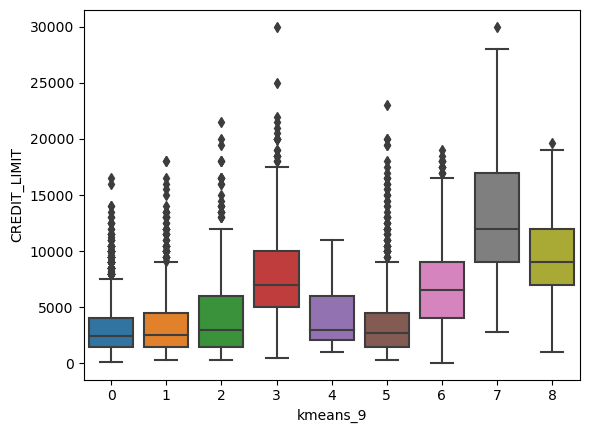

In [31]:
sns.boxplot(x='kmeans_9', y ='CREDIT_LIMIT', data=df)

Here just to show the clear separation of credit_limit between clusters. We expect cluster 4 to get the best credit limit.

## Assign new customers

In [32]:
new_df = pd.read_csv('new_data.csv')

In [33]:
X = new_df[keep_cols1]
y_pred_new = mk.predict(X) #This m here also predicts clusters


In [34]:
y_pred_new

array([0, 1, 0, 3, 7, 6, 1, 8, 0, 3, 0, 3, 0, 1, 0, 0, 6, 6, 7, 3, 0, 8,
       2, 3, 6, 3, 0, 0, 0, 0, 5, 2, 1, 5, 0, 5, 0, 6, 5, 5, 5, 2, 6, 1,
       6, 1, 5, 0, 3, 0, 1, 3, 6, 6, 6, 3, 0, 0, 5, 0, 0, 0, 3, 3, 0, 1,
       3, 7, 6, 0, 5, 1, 5, 0, 5, 3, 5, 5, 5, 0, 6, 1, 0, 0, 5, 1, 1, 5,
       1, 1, 1, 0, 6, 1, 5, 1, 2, 0, 5, 5, 0, 1, 6, 1, 6, 3, 0, 0, 0, 3,
       0, 0, 1, 6, 6, 1, 0, 5, 0, 0, 6, 6, 3, 1, 0, 5, 3, 0, 0, 7, 0, 3,
       0, 0, 1, 2, 2, 0, 5, 1, 2, 1, 1, 1, 6, 1, 1, 0, 1, 6])

In [35]:
new_df['cluster'] = y_pred_new #hasta aqui llegue en spyder

In [36]:
new_df[keep_cols1]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,0.000000,NaN,0.000,12
1,1162.273324,1.000000,1347.71,400.00,947.71,175.815755,1.000000,0.083333,1.000000,0.166667,2,45,645.998299,256.848991,0.000,12
2,1311.995984,1.000000,1283.90,1283.90,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,0.000000,NaN,0.000,12
3,6571.484039,1.000000,9325.22,9325.22,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,5,11036.726680,1824.680131,0.000,12
4,11209.370760,1.000000,11147.33,1137.40,10009.93,2728.576925,1.000000,0.250000,1.000000,0.166667,8,126,7932.774020,17494.907350,0.000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,5.721468,0.900000,83.43,0.00,83.43,0.000000,0.900000,0.000000,0.800000,0.000000,0,9,78.559954,91.631089,0.375,10
146,16.341186,0.666667,207.54,0.00,207.54,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,126.616901,27.446256,0.200,6
147,1055.087681,0.666667,0.00,0.00,0.00,1820.116200,0.000000,0.000000,0.000000,0.333333,2,0,54.795084,233.229870,0.000,6
148,91.639086,1.000000,315.20,147.80,167.40,0.000000,1.000000,0.333333,0.833333,0.000000,0,8,231.274641,86.344733,0.250,6


Text(0, 0.5, 'Count')

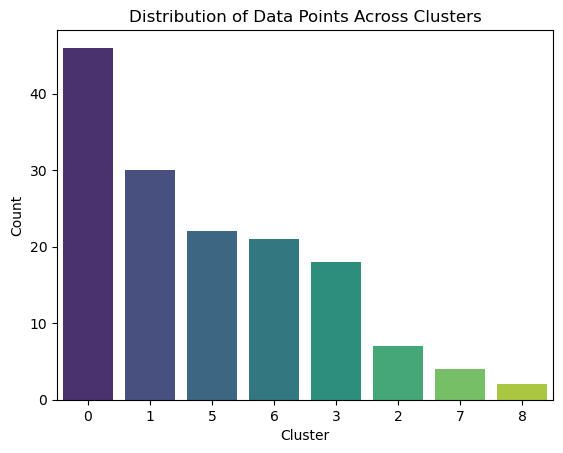

In [37]:
sns.countplot(x='cluster', data=new_df, order=new_df['cluster'].value_counts().index, palette='viridis')
plt.title('Distribution of Data Points Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')

## Save it to csv including the cluster

In [38]:
new_df.to_csv('new_data_clustered.csv')

# Predict credit_limit

## Regression Model per cluster

In [39]:
def model_results(y_test, y_pred2, model=''):
    print('RMSE:', mean_squared_error(y_test, y_pred2, squared=False))
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x=y_test, y=y_pred2, color='blue', alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    plt.xlabel('Real Values (y_test)')
    plt.ylabel('Predicted Values (y_pred)')
    plt.title(f'Real vs. Predicted Values {model}')
    plt.show()

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
params = {'n_estimators': 600,
 'min_samples_split': 16,
 'max_depth': 12,
 'learning_rate': 0.01,
 "loss": "huber",}

In [42]:
target = 'CREDIT_LIMIT'
X = df[keep_cols1]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 123)


In [43]:
stepsgb = [('preprocess', preprocess),('gb', GradientBoostingRegressor(**params))]
reg = Pipeline(stepsgb)

RMSE: 2021.342344234302


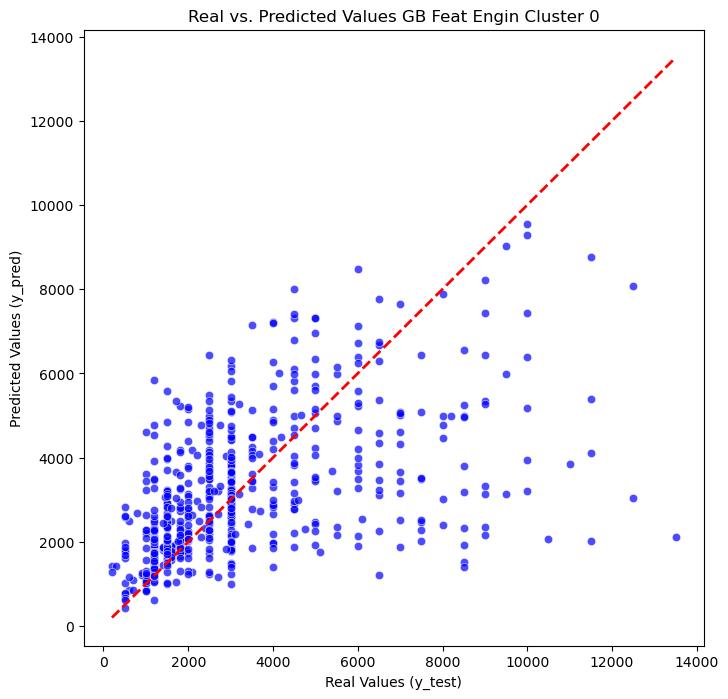

RMSE: 2264.727301008604


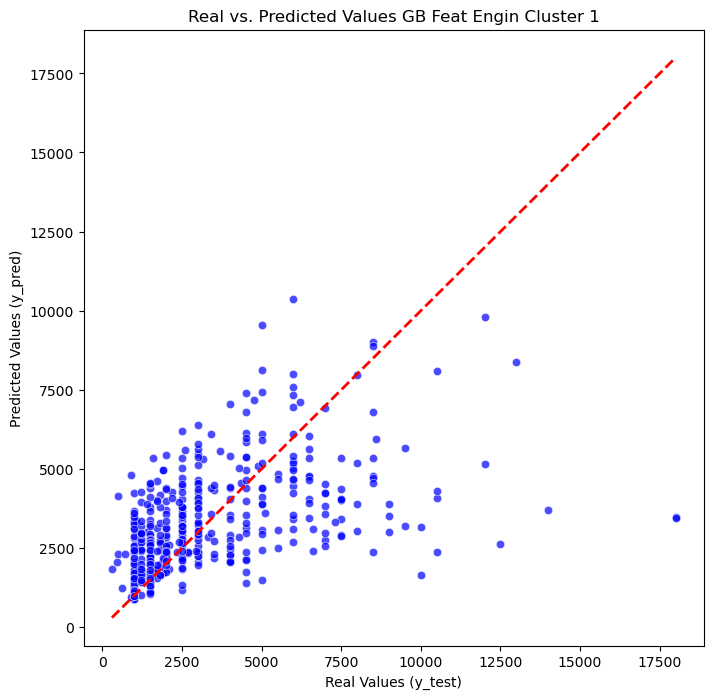

RMSE: 3062.7487379372155


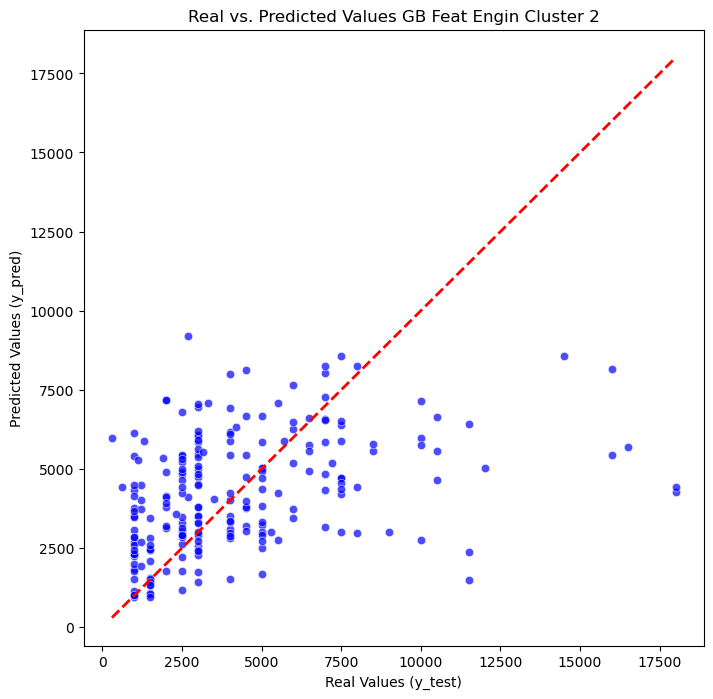

RMSE: 3320.3788369948943


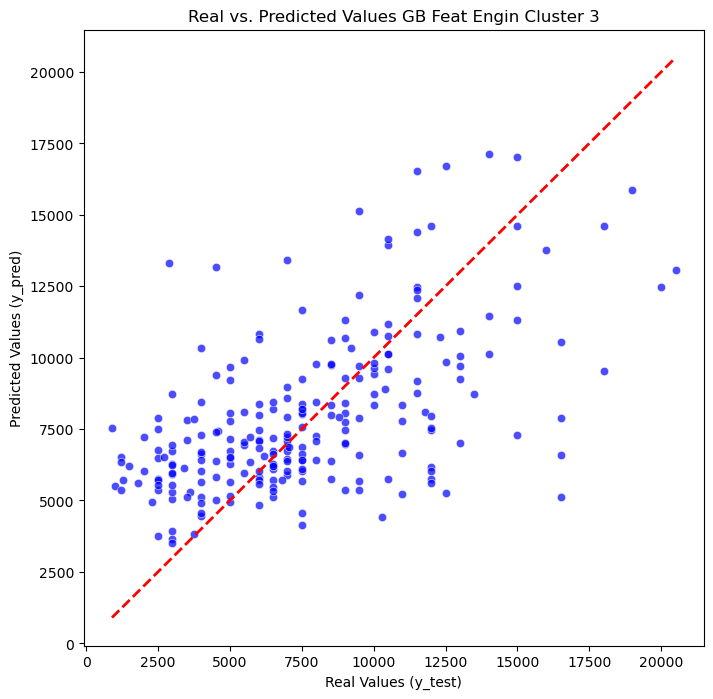

RMSE: 1317.1104077586406


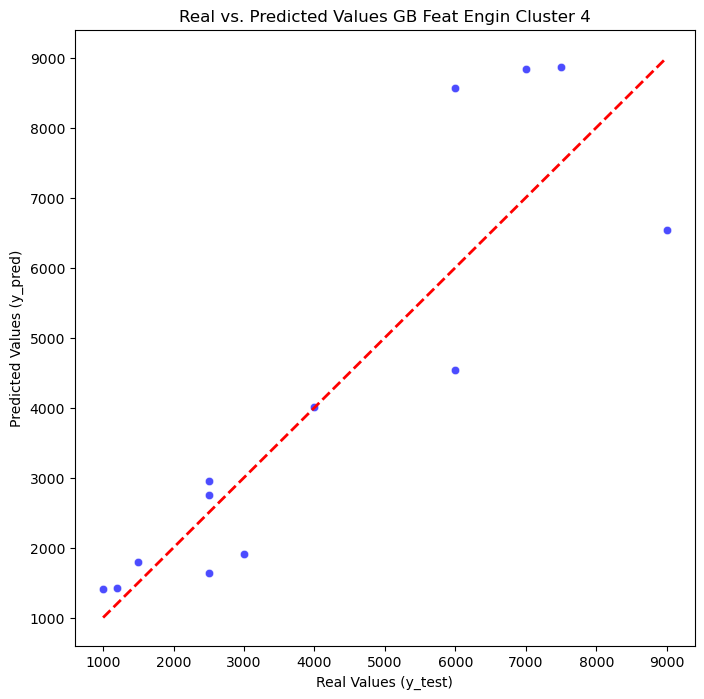

RMSE: 2973.7499044106826


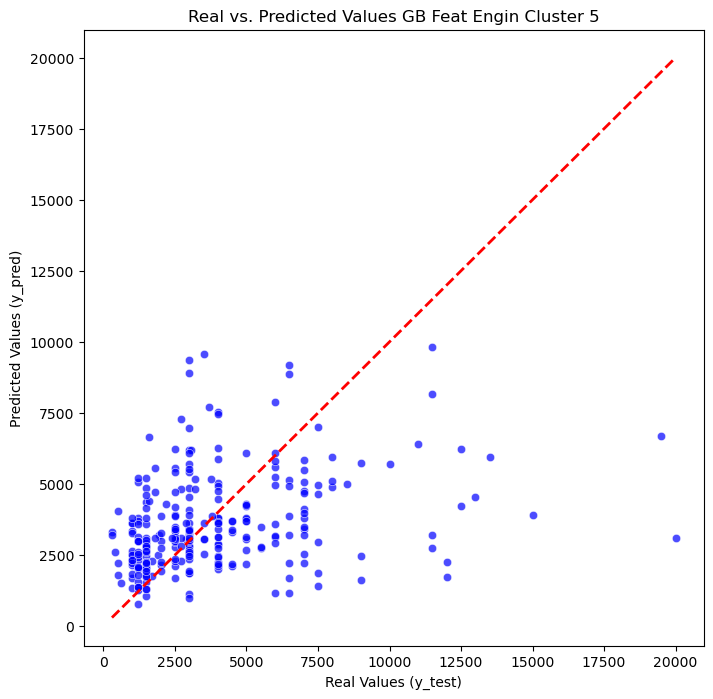

RMSE: 2392.0957851112266


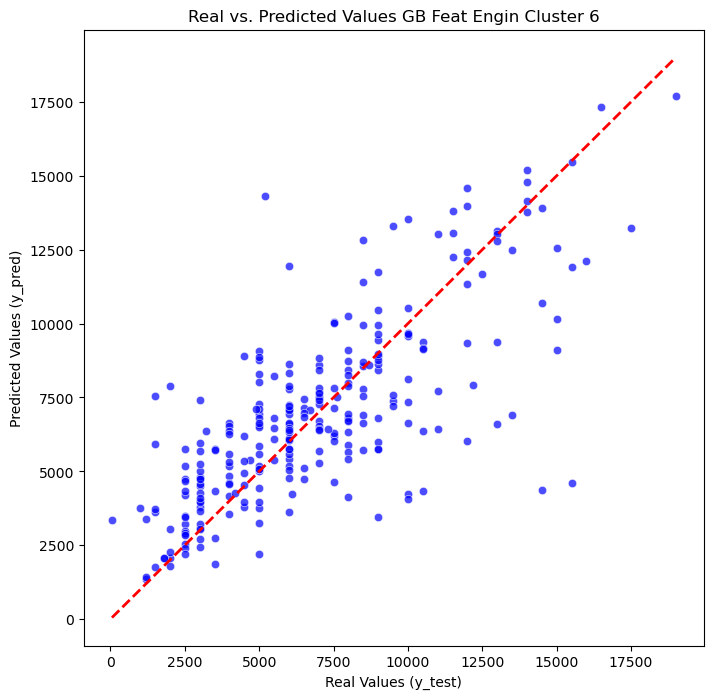

RMSE: 5292.746836148949


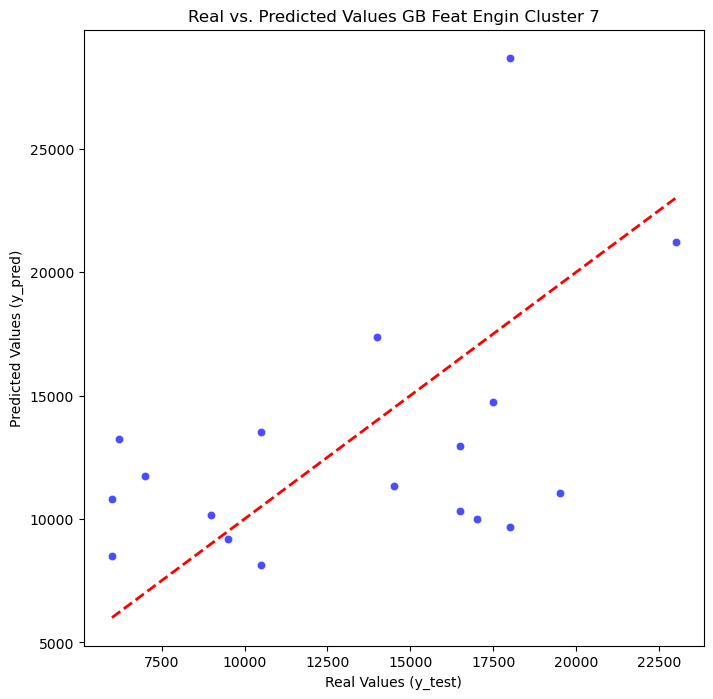

RMSE: 2469.628305300656


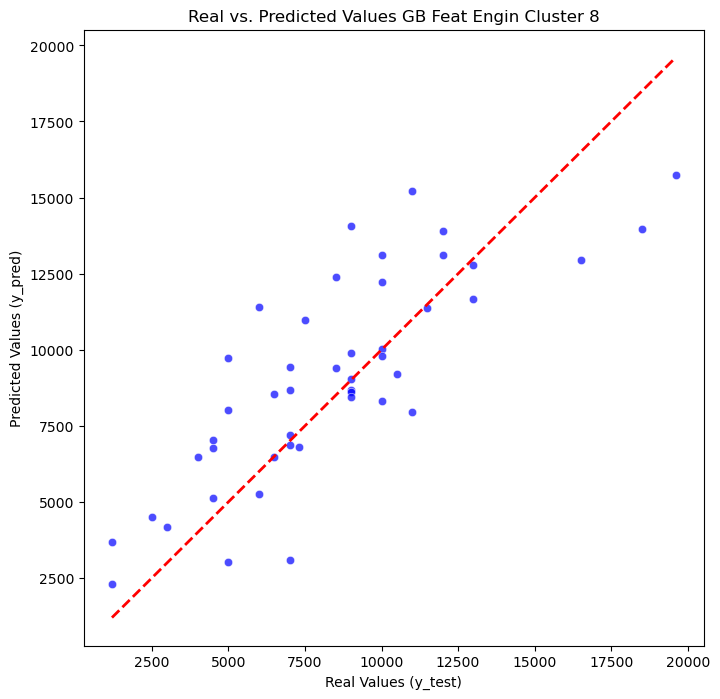

In [44]:
reg=[]
for i in range(0,9):
    reg.append(Pipeline(stepsgb))
    X = df[df['kmeans_9'] == i][keep_cols1]
    y = df[df['kmeans_9'] == i][target]
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 123)
    reg[i].fit(X_train, y_train)
    y_pred = reg[i].predict(X_test)
    model_results(y_test, y_pred, f'GB Feat Engin Cluster {i}')

In [45]:
y_pred

array([ 4166.74326192,  4519.14660526, 11387.3014326 ,  9403.0674901 ,
        3014.53115846,  6866.65644011, 10991.12718287,  7023.44354678,
       14060.58536408,  8673.09919022, 15226.31352406,  8673.79723167,
       12224.28819772,  9198.6524686 , 10010.88746091, 13110.05849086,
        8535.47564109,  8621.08184547,  3092.46105965,  8313.5724212 ,
       13890.87512162, 13973.52485087,  9441.70665777,  5253.22145094,
        9051.75107835, 11666.17631135, 11395.09430043,  6463.10998321,
       12376.50297664,  9906.33430098,  6481.15699063,  5132.54960662,
        7203.44086437,  6758.81999613, 15737.49857163,  9794.82558078,
        2288.88650642, 13122.21991811,  6810.54116172, 12944.20581548,
        8018.74626353, 12785.59039163,  3685.99850681,  7957.26385889,
        8452.10040443,  9740.80499583])

## Predicting new  Data

In [46]:
def predict_credit(data, cluster):
    if isinstance(data, pd.Series):
        data = data.to_frame().T
    model = reg[cluster]
    credit_limit = model.predict(data)
    
    return credit_limit

In [47]:
df_predict = new_df[keep_cols1]
for i in range(len(new_df)):
    predicted_credit = predict_credit(df_predict.loc[i], new_df.loc[i, 'cluster'])
    new_df.at[i, 'CREDIT_PREDICTED'] = predicted_credit

In [48]:
new_df['CREDIT_PREDICTED']

0       8173.462931
1       8460.616772
2       8607.512990
3      12207.286725
4      11147.582138
           ...     
145     5776.897893
146     6503.149601
147     6470.611341
148     6647.095431
149    13550.859828
Name: CREDIT_PREDICTED, Length: 150, dtype: float64

In [49]:
new_df

,Unnamed: 0,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,CREDIT_PREDICTED
0,4,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,0.000000,NaN,0.000,12,0,8173.462931
1,32,C10032,1162.273324,1.000000,1347.71,400.00,947.71,175.815755,1.000000,0.083333,1.000000,0.166667,2,45,645.998299,256.848991,0.000,12,1,8460.616772
2,56,C10057,1311.995984,1.000000,1283.90,1283.90,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,0.000000,NaN,0.000,12,0,8607.512990
3,225,C10233,6571.484039,1.000000,9325.22,9325.22,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,5,11036.726680,1824.680131,0.000,12,3,12207.286725
4,394,C10407,11209.370760,1.000000,11147.33,1137.40,10009.93,2728.576925,1.000000,0.250000,1.000000,0.166667,8,126,7932.774020,17494.907350,0.000,12,7,11147.582138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,8810,C19049,5.721468,0.900000,83.43,0.00,83.43,0.000000,0.900000,0.000000,0.800000,0.000000,0,9,78.559954,91.631089,0.375,10,1,5776.897893
146,8821,C19060,16.341186,0.666667,207.54,0.00,207.54,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,126.616901,27.446256,0.200,6,1,6503.149601
147,8921,C19161,1055.087681,0.666667,0.00,0.00,0.00,1820.116200,0.000000,0.000000,0.000000,0.333333,2,0,54.795084,233.229870,0.000,6,0,6470.611341
148,8928,C19168,91.639086,1.000000,315.20,147.80,167.40,0.000000,1.000000,0.333333,0.833333,0.000000,0,8,231.274641,86.344733,0.250,6,1,6647.095431


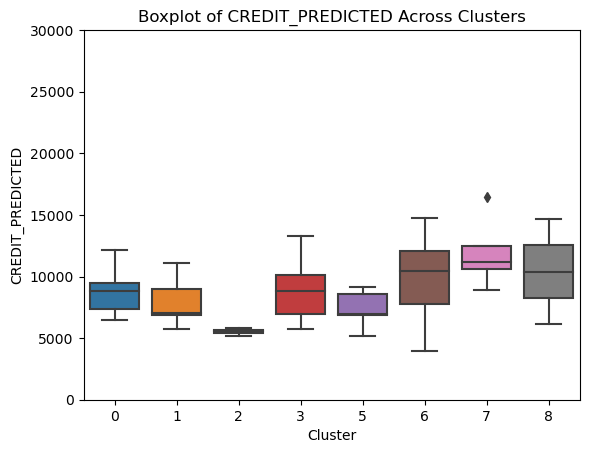

In [50]:
sns.boxplot(x='cluster', y ='CREDIT_PREDICTED', data=new_df)
# Set the y-axis limits
plt.ylim(0, 30000)

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('CREDIT_PREDICTED')
plt.title('Boxplot of CREDIT_PREDICTED Across Clusters')
plt.show()

In [52]:
new_df.to_csv('new_data_with_credit_limit.csv')

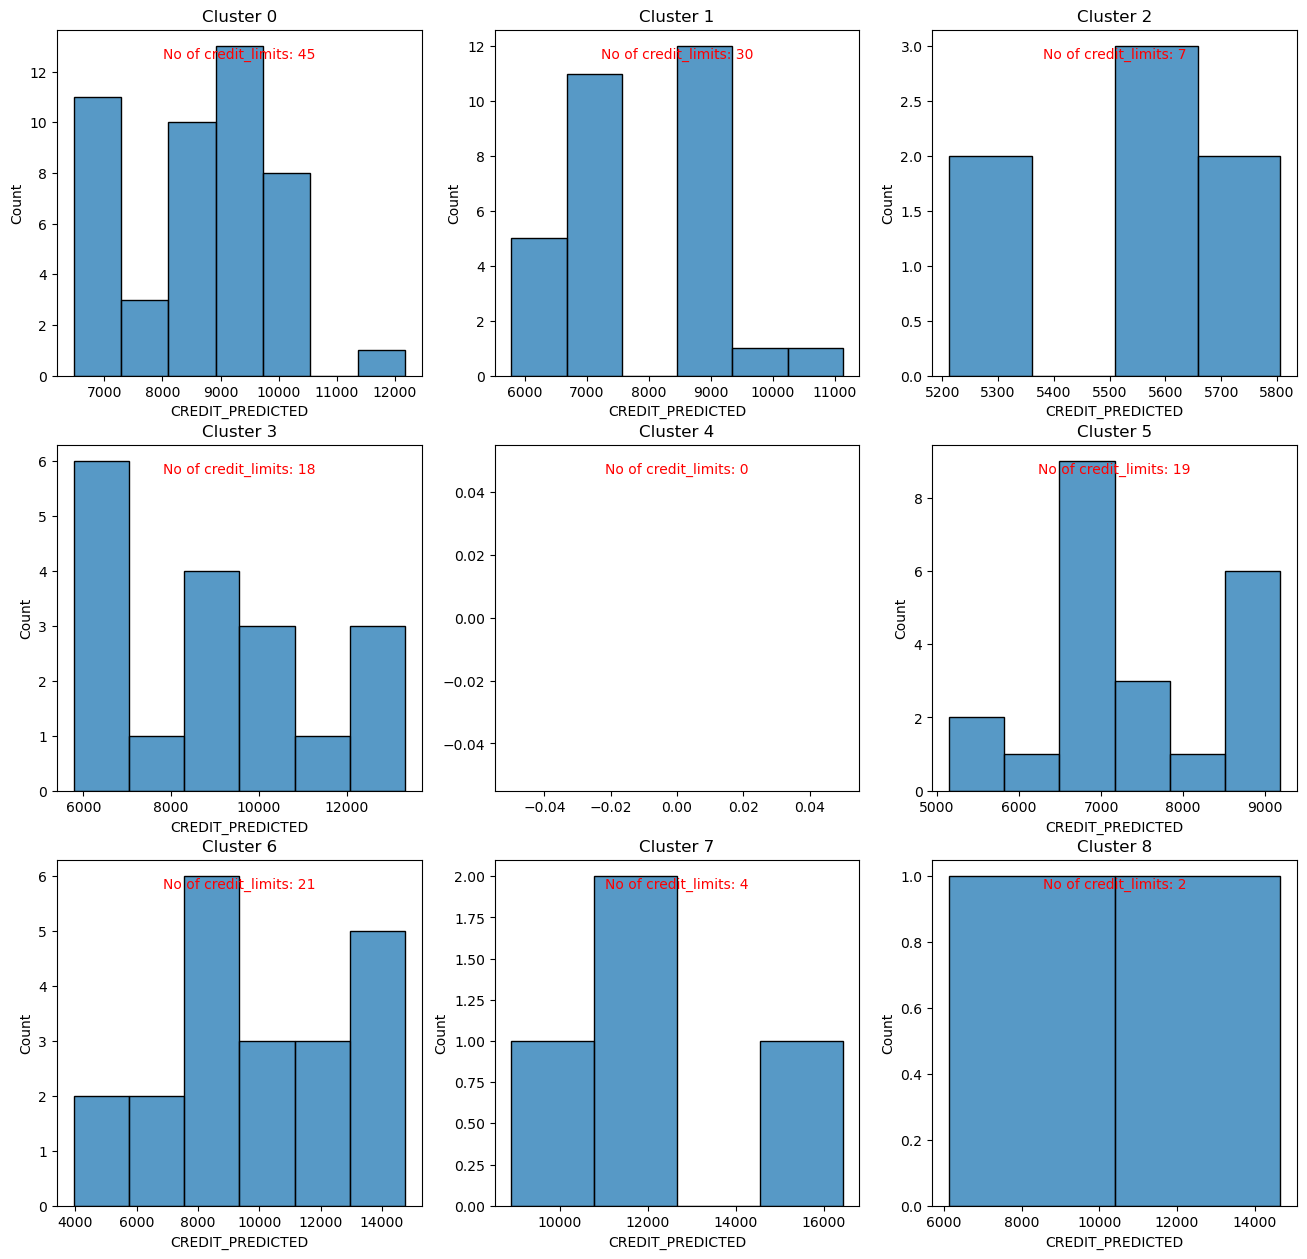

In [53]:
fig, ax = plt.subplots(3,3, figsize=(16,12))
ax = ax.flatten()
for i in range(best_n):
    credit_limit_counts = new_df[new_df['cluster']==i]['CREDIT_PREDICTED'].value_counts()
    # sns.barplot(x=credit_limit_counts.index, y=credit_limit_counts.values, palette='viridis', ax=ax[i])
    sns.histplot(new_df[new_df['cluster']==i]['CREDIT_PREDICTED'], ax=ax[i])
    ax[i].text(0.5, 0.95, f'No of credit_limits: {len(credit_limit_counts)}', transform=ax[i].transAxes,
               verticalalignment='top', horizontalalignment='center', color='red', fontsize=10)
    ax[i].set(title=f'Cluster {i}')
plt.subplots_adjust(bottom=-0.1)
plt.show()

## Trying a classification model

First select only the credit limits with more than 10 rows within it

In [54]:
credit_limit_counts = df['CREDIT_LIMIT'].value_counts()
# Filter the counts to include only those greater than 10
filtered_credit_limit_counts = credit_limit_counts[credit_limit_counts > 10]

In [55]:
# Split the dataframe into those in the credit_limit with more than 10 counts and those with less
mask_classification = df['CREDIT_LIMIT'].isin(filtered_credit_limit_counts.index)
df_to_class = df[mask_classification]
df_to_reg = df[~mask_classification]

Little comparison of both

In [56]:
df_to_class.describe()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,kmeans_9,purch_per_trx,cash_adv_per_trx,BALANCE_by_freq,ONEOFF_PURCHASES_by_freq,INSTALLMENTS_PURCHASES_by_freq,CASH_ADVANCE_by_freq,interest_p_year
count,8439.000000,8439.000000,8439.000000,8439.000000,8439.000000,8439.000000,8439.000000,8439.000000,8439.000000,8439.000000,...,8439.000000,8439.000000,8439.000000,8439.000000,8439.000000,8439.000000,8439.000000,8439.000000,8439.000000,8439.000000
mean,4503.919303,1527.161940,0.876113,957.925783,562.015844,396.224183,971.175163,0.488182,0.198078,0.363638,...,0.155029,11.508354,2.357270,71.484192,209.604930,1494.757250,358.187874,322.337345,388.322796,179.385041
std,2592.395462,2009.656414,0.237773,1998.010777,1555.318233,829.297718,2033.411591,0.401713,0.295880,0.397434,...,0.293546,1.348459,2.335253,154.160601,542.065760,2007.596365,1343.702560,768.403331,1168.346144,316.748716
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-782.219851
25%,2248.500000,125.349915,0.875000,35.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,...,0.000000,12.000000,0.000000,11.372391,0.000000,98.424058,0.000000,0.000000,0.000000,18.794339
50%,4517.000000,865.161494,1.000000,353.430000,28.580000,87.510000,0.000000,0.500000,0.083333,0.166667,...,0.000000,12.000000,1.000000,40.751250,0.000000,816.765152,2.499990,19.446706,0.000000,82.652760
75%,6762.500000,2005.828367,1.000000,1071.265000,545.475000,461.350000,1113.896495,0.916667,0.250000,0.750000,...,0.142857,12.000000,5.000000,77.714000,246.812507,1969.692683,152.415818,327.261631,218.489488,226.386218
max,8950.000000,19043.138560,1.000000,41050.400000,40624.060000,15497.190000,29282.109150,1.000000,1.000000,1.000000,...,1.000000,12.000000,8.000000,5981.666667,14836.451410,19043.138560,34087.730000,15497.190000,23812.774690,6827.215467


In [57]:
df_to_reg.describe()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,kmeans_9,purch_per_trx,cash_adv_per_trx,BALANCE_by_freq,ONEOFF_PURCHASES_by_freq,INSTALLMENTS_PURCHASES_by_freq,CASH_ADVANCE_by_freq,interest_p_year
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,...,360.000000,360.000000,360.0000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,3662.663889,2360.697539,0.913449,2011.285250,1252.904833,758.476861,1060.801269,0.558473,0.308560,0.391714,...,0.140831,11.747222,2.5500,124.889875,180.598506,2319.991554,858.761836,593.099062,527.580293,305.715479
std,2304.165297,3190.516987,0.200608,4120.490154,3194.137896,1908.493328,3184.316127,0.387895,0.338518,0.400336,...,0.287728,0.938198,2.3856,251.120854,350.000419,3187.816217,2761.233941,1433.920562,2783.504344,450.864778
min,22.000000,3.744802,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.000000,0.0000,0.000000,0.000000,0.359656,0.000000,0.000000,0.000000,-669.407860
25%,1623.250000,224.189600,1.000000,159.737500,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,...,0.000000,12.000000,0.0000,27.747665,0.000000,219.638731,0.000000,0.000000,0.000000,40.402198
50%,3532.500000,1110.330966,1.000000,810.900000,335.515000,133.320000,0.000000,0.583333,0.166667,0.303030,...,0.000000,12.000000,2.0000,58.367532,0.000000,1108.556693,58.558125,43.333290,0.000000,166.426407
75%,5505.250000,3121.698795,1.000000,2011.642500,1202.052500,794.235000,901.702912,1.000000,0.554925,0.833333,...,0.090909,12.000000,5.0000,103.439654,237.516218,3050.983502,549.070214,500.600517,184.063086,390.563114
max,8749.000000,18495.558550,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,...,1.000000,12.000000,8.0000,1875.000000,1916.534565,18495.558550,40761.250000,14686.100000,47137.211760,2920.590168


In [58]:
X = df_to_class[keep_cols1]
# The task will be to classify the point to a credit limit
y = df_to_class['CREDIT_LIMIT']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 123)

In [59]:
steps = [('preprocess', preprocess),('logit', LogisticRegressionCV(cv=3, max_iter=10000))]
m = Pipeline(steps)
m.fit(X_train, y_train)
y_pred = m.predict(X_test)

In [60]:
y_pred

array([1200., 4000., 3000., ..., 4000., 1200., 1000.])

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       300.0       0.00      0.00      0.00         6
       500.0       0.22      0.26      0.24        23
       600.0       0.00      0.00      0.00         3
       700.0       0.00      0.00      0.00         5
      1000.0       0.25      0.51      0.33       148
      1200.0       0.17      0.52      0.26       139
      1300.0       0.00      0.00      0.00         2
      1400.0       0.00      0.00      0.00         7
      1500.0       0.15      0.13      0.14       161
      1600.0       0.00      0.00      0.00         8
      1700.0       0.00      0.00      0.00        23
      1800.0       0.00      0.00      0.00        54
      1900.0       0.00      0.00      0.00         7
      1950.0       0.00      0.00      0.00         7
      2000.0       0.25      0.01      0.02        97
      2100.0       0.00      0.00      0.00         5
      2200.0       0.00      0.00      0.00         3
      2300.0       0.00    

C:\Users\52555\anaconda3-\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\52555\anaconda3-\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\52555\anaconda3-\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It was a good learning trying

In [62]:
columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
           'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
           'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
           'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
           'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS', 'MINIMUM_PAYMENTS',
           'PRC_FULL_PAYMENT', 'TENURE']

data = [1666, 0.63, 1499, 1499, 0, 205, 0.08, 0.08, 0, 0.08, 1, 1, 0, 253, 0, 12]

df_input = pd.DataFrame([data], columns=columns)

In [63]:
cluster_num=mk.predict(df_input)

In [64]:
cluster_num[0]

5

In [71]:
predict_credit(df_input, cluster_num[0])

array([10424.841557])

(0.0, 1.0, 0.0, 1.0)

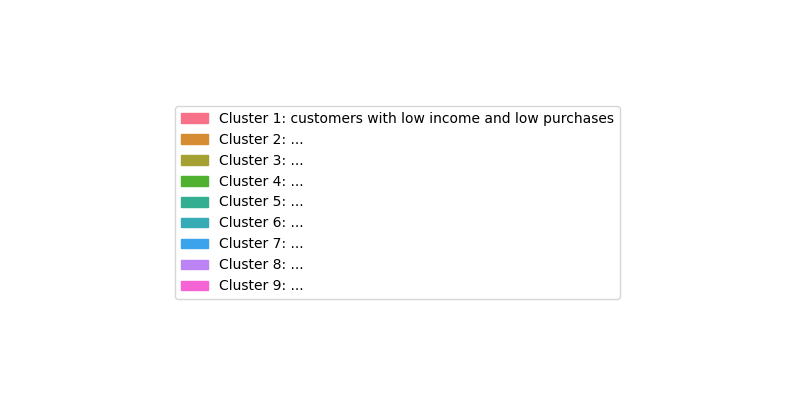

In [69]:
import matplotlib.patches as mpatches  
custom_palette = sns.color_palette('husl', n_colors=9)  # You can choose a different palette
sns.set_palette(custom_palette)

cluster_descriptions = {
    1: 'Cluster 1: customers with low income and low purchases',
    2: 'Cluster 2: ...',  # Add descriptions for other clusters
    3: 'Cluster 3: ...',
    4: 'Cluster 4: ...',
    5: 'Cluster 5: ...',
    6: 'Cluster 6: ...',
    7: 'Cluster 7: ...',
    8: 'Cluster 8: ...',
    9: 'Cluster 9: ...',
}
# Create a legend-like plot with cluster colors and descriptions
patches = [mpatches.Patch(color=custom_palette[i - 1], label=cluster_descriptions[i]) for i in cluster_descriptions]
     
plt.figure(figsize=(10, 5))
plt.legend(handles=patches, loc='center', bbox_to_anchor=(0.5, 0.5))
      
# Hide the axes
plt.axis('off')

Text(0, 0.5, 'Counts')

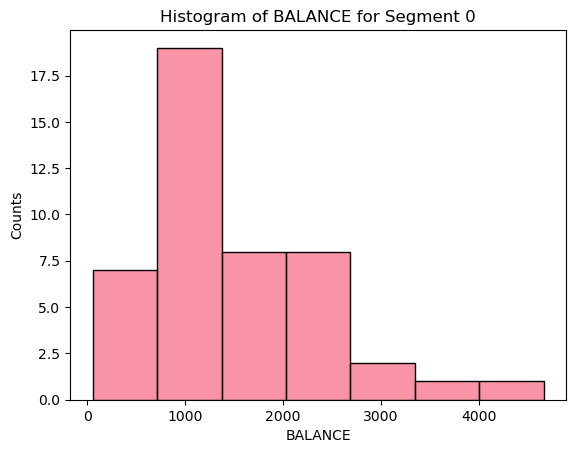

In [79]:
        selected_segment = 0
        selected_feature = 'BALANCE'
    
        filtered_data = new_df[new_df['cluster'] == selected_segment]
        
        sns.histplot(data=filtered_data, x=selected_feature)
        plt.title(f"Histogram of {selected_feature} for Segment {selected_segment}")
        plt.xlabel(selected_feature)
        plt.ylabel('Counts')

In [74]:
filtered_data

,Unnamed: 0,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,CREDIT_PREDICTED
30,2521,C12594,11.269672,0.636364,248.31,0.00,248.31,0.000000,0.416667,0.000000,0.416667,0.000000,0,10,36.844388,66.224535,0.000000,12,5,6867.464604
33,2629,C12704,266.475852,0.272727,0.00,0.00,0.00,1560.735908,0.000000,0.000000,0.000000,0.166667,2,0,792.623374,226.586503,0.000000,12,5,7204.405237
35,2806,C12887,111.729154,0.454545,824.10,824.10,0.00,344.286557,0.166667,0.166667,0.000000,0.083333,2,9,2961.848966,143.140487,1.000000,12,5,5145.174516
38,2860,C12943,409.194212,0.545455,1213.23,1213.23,0.00,1751.419465,0.250000,0.250000,0.000000,0.416667,8,9,5997.800728,178.416838,0.000000,12,5,6228.814587
39,3000,C13088,36.607995,0.545455,224.40,224.40,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,2,372.093413,151.080030,0.000000,12,5,6939.535397
40,3184,C13275,845.307601,0.181818,0.00,0.00,0.00,5452.074197,0.000000,0.000000,0.000000,0.083333,1,0,1148.343858,1441.839102,0.000000,12,5,8745.785182
46,3425,C13521,669.973636,0.545455,0.00,0.00,0.00,1479.440572,0.000000,0.000000,0.000000,0.166667,3,0,1616.215963,121.550312,0.000000,12,5,7204.405237
58,4048,C14162,44.192011,0.454545,356.00,356.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,2,836.690499,205.907225,0.000000,12,5,6939.535397
70,4800,C14933,472.663708,0.545455,310.44,0.00,310.44,0.000000,0.416667,0.000000,0.416667,0.000000,0,5,2493.243567,222.654608,0.142857,12,5,6887.940150
72,4947,C15085,164.583178,0.454545,1489.28,918.48,570.80,0.000000,0.333333,0.250000,0.250000,0.000000,0,8,1858.087268,176.445411,0.000000,12,5,6936.753447
